# CBU5201_miniproject

# 1 Author

**Student Name**:  Han Jiarui

**Student ID**:  221167054



# 2 Problem formulation

Distinguishing between true and deceptive stories is a challenging problem because the way deception is expressed is subjective and subtle. Different individuals may convey deceptive content in different ways, and capturing these nuances and reflecting them in a machine learning model is a highly intriguing challenge. What makes this even more appealing to me is that this challenge allows me to apply what I’ve learned, using my knowledge of machine learning in a practical context to better understand its concepts through application. Moreover, the detection of deceptive content has significant real-world applications, such as identifying false information in media, verifying the authenticity of interviews or podcasts, and improving automated systems for truth verification.

# 3 Methodology

In my code, I used feature extraction and machine learning classification methods based on audio data. Below is a detailed explanation of the methodology:

### 1. Training Task
The goal is to differentiate between two types of stories from audio data: True Story and Deceptive Story, which is a binary classification problem.
- **Preprocessing**: Convert the text labels ('True Story' and 'Deceptive Story') into numbers (1 and 0), making it easier for machine learning models to process.
- **Input Data**: Each sample's input consists of multi-dimensional features extracted from the audio file, including:
  - **MFCC (Mel Frequency Cepstral Coefficients)**: Reflects the spectral characteristics of the audio, used to describe the main acoustic features of the sound.
  - **Chroma**: Represents the pitch information of the audio.
  - **Spectral Contrast**: Measures the contrast between different frequency bands.
  - **ZCR (Zero Crossing Rate)**: Measures the frequency at which the audio signal crosses the zero value, reflecting the volatility of the signal.
  
  After extraction, all features (MFCC, Chroma, Spectral Contrast, Zero Crossing Rate) are averaged and concatenated, creating a feature vector for each audio file.
- **Data Processing**:
  - **Denoising**: Use the `noisereduce` library to reduce background noise, enhancing the quality of the audio signal.
  - **Normalization**: Standardize the extracted features using `StandardScaler` to ensure they have a mean of 0 and a variance of 1, ensuring that feature values have similar distributions during training.
  - Split the data into a training set (70%) and a testing set (30%) for model training and evaluation.
- **Model Selection**: Random Forest Classifier.
  - Random Forest is an ensemble learning method based on multiple decision trees, which is effective in handling high-dimensional data and is robust.

### 2. Validation Task
After training, the model's performance is validated on the test set. The main steps include:
- **Data Splitting**: Use `train_test_split` to divide the dataset into training and test sets, with 70% used for training and 30% for testing.
- **Model Evaluation Metrics**:
  - **Accuracy**: Measures the overall correctness of predictions, i.e., the proportion of correctly predicted samples over the total number of samples.
  - **Classification Report**: Provides a more comprehensive set of classification performance metrics, including:
    - **Precision**: The proportion of actual positive samples among those predicted as positive.
    - **Recall**: The proportion of correctly predicted positive samples out of the actual positive samples.
    - **F1-Score**: The harmonic mean of precision and recall, used to balance evaluation.
  - **Confusion Matrix**: Visualizes the model's correct predictions and misclassifications for each category.

### 3. Feature Extraction Task
To ensure that the model can accurately capture audio features, the feature extraction process is crucial for model building:
  
#### Feature Extraction Steps:
1. Load the audio data using `librosa`.
2. Perform denoising to reduce background noise interference.
3. Extract various spectral features and calculate their means, combining them into a one-dimensional array.
4. Repeat the above steps for each audio file to generate the feature matrix.

# 4 Implemented ML prediction pipelines

In the code, I implemented a machine learning prediction pipeline using audio data as input. The goal is to classify the type of story (real or fictional). The entire pipeline is divided into the following main stages, with the data format and processing steps for each stage outlined below:

1. **Input Stage**:  
   - **Input**: Audio files and their corresponding classification labels.  
   - **Format**: Audio files are in `.wav` format, and labels are text fields in a `.csv` file.  
   - **Output**: Audio feature vectors and their corresponding classification labels.  

2. **Feature Extraction Stage (Transformation Stage)**:  
   - **Input**: Audio data (time-domain signals) and sampling rate.  
   - **Processing**: Audio data is converted into feature vectors using audio feature extraction algorithms (e.g., MFCC, Chroma, Spectral Contrast, ZCR).  
   - **Output**: NumPy arrays of feature vectors, with each audio file corresponding to one feature vector.  

3. **Feature Standardization Stage**:  
   - **Input**: Raw feature vectors generated from the feature extraction stage.  
   - **Processing**: Features are standardized using `StandardScaler` to ensure zero mean and unit variance for the feature values.  
   - **Output**: Standardized feature vector arrays.  

4. **Model Training Stage (Model Stage)**:  
   - **Input**: Standardized feature vectors and their corresponding classification labels.  
   - **Processing**: The data is split into training and testing sets, and a Random Forest Classifier is trained to build the model.  
   - **Output**: A trained classification model and the model’s predictions on the test set.  

5. **Model Evaluation Stage**:  
   - **Input**: Feature vectors of the test set and the true labels.  
   - **Processing**: The trained model predicts the test set labels, and performance is evaluated using a classification report and accuracy score.  
   - **Output**: Model performance metrics (e.g., accuracy).  

## 4.1 Transformation stage

In my code, the primary transformation stage is **feature extraction**, and the details are as follows:

### 1. Feature Extraction:
The audio data is loaded using the `librosa` library. Specifically, audio files are read through `librosa.load`, which generates the audio signal and sampling rate.  
After loading, noise reduction is applied to the audio signal using `noisereduce.reduce_noise` to minimize the impact of background noise on feature extraction.

From the denoised audio signal, the following features are extracted:
1. **MFCC (Mel-Frequency Cepstral Coefficients)**: Extracted using `librosa.feature.mfcc`, this feature captures the spectral information of the audio. A total of 13 MFCC coefficients are extracted.  
2. **Chroma Features**: Extracted using `librosa.feature.chroma_stft`, these represent the energy distribution across different pitches.  
3. **Spectral Contrast**: Extracted using `librosa.feature.spectral_contrast`, this reflects the contrast in energy distribution within the spectrum.  
4. **Zero Crossing Rate (ZCR)**: Extracted using `librosa.feature.zero_crossing_rate`, this describes the frequency of zero crossings in the signal.  

Each of these features is computed and averaged using `np.mean`, forming a feature vector for each audio sample. Finally, all the features (MFCCs, Chroma, Spectral Contrast, ZCR) are concatenated into a single feature vector using `np.hstack`.

The output is a two-dimensional NumPy array (`features`) containing all the audio features, along with a corresponding array of labels (`labels`).  
Each row represents the feature vector for an audio sample, and each column corresponds to the extracted features (e.g., MFCC, Chroma, etc.).


### 2. Reasons for Choosing This Feature Extraction Stage:
**A. Noise Reduction**: Audio data often contains environmental noise. Noise reduction improves the signal quality, thereby enhancing the accuracy of the extracted features.

**B. MFCC Features**: MFCC is one of the most commonly used features in audio analysis. It effectively captures spectral information and is especially suitable for classification tasks involving speech and music.

**C. Chroma Features**: Chroma features reflect pitch distribution and are an essential dimension of audio signals, particularly effective in pitch-related classification tasks.

**D. Spectral Contrast**: Spectral contrast provides additional information about the energy distribution in the spectrum, helping to distinguish audio categories with different spectral characteristics.

**E. Zero Crossing Rate (ZCR)**: ZCR reflects the frequency characteristics of the audio signal and is particularly useful for coarse classification tasks involving speech or music.


By applying these feature extraction methods and combining multi-dimensional audio features, it becomes possible to maximize the capture of useful information from the audio data. This ensures high-quality input data for subsequent classification tasks. These transformation steps not only improve data usability but also reduce noise and redundant information in the raw audio data.  
The resulting feature matrix (`features`) and labels (`labels`) form the inputs and outputs for classification tasks, meeting the requirements for model training and prediction.

## 4.2 Model stage

In my code, I chose the Random Forest Classifier as the machine learning model. Below is the description of the model and the reasons for its selection:

1. **Model Description**:  
The Random Forest Classifier is an ensemble learning method that builds multiple decision trees and performs classification or regression by voting or averaging their predictions. Its core idea is to combine the results of multiple weak learners (i.e., individual decision trees) to create a stronger model, thereby improving predictive performance and robustness.

- **Input Features**: Features extracted from audio files, including MFCC, Chroma features, Spectral Contrast, and Zero-Crossing Rate, are standardized through feature engineering to serve as the model's input.  
- **Output**: The model predicts the type of audio story (True Story or Deceptive Story), which is a binary classification problem.

2. **Reasons for Choosing the Random Forest Model**:  

**A. Strong Robustness**:  
Random Forest is a non-parametric model that demonstrates high robustness to noise and missing values in data.  
In our dataset, audio data may have some noise and uneven feature distributions. Random Forest can effectively mitigate these issues through the voting mechanism of multiple trees.

**B. Stable Performance**:  
Random Forest performs well when handling high-dimensional features and avoids overfitting issues common with single decision trees.  
In our dataset, audio features include multiple dimensions (e.g., 13-dimensional MFCC features, 12-dimensional Chroma features, etc.), and Random Forest can effectively utilize these diverse features for classification.

**C. Good Interpretability**:  
Random Forest can provide feature importance evaluation, which helps us analyze which audio features (e.g., MFCC, Chroma, or others) contribute most to the classification task. This guides subsequent feature engineering and model optimization.

**D. Easy Implementation and High Computational Efficiency**:  
The Random Forest Classifier is very easy to implement (via Scikit-learn's `RandomForestClassifier`) and offers fast training and prediction speeds, enabling quick results.  
In the code, the Random Forest interface provided by Sklearn is directly called, saving time on complex model tuning.

## 4.3 Ensemble stage

First, I chose to use the Random Forest Classifier (RandomForestClassifier), which is an ensemble learning method. Below is a detailed description of this method and the reasons for choosing it:


### 1. The Basic Principle of Random Forest
Random Forest is an ensemble learning method based on decision trees. It performs classification or regression tasks through the following mechanisms:
- Constructs multiple decision trees, where each tree is built using random sampling with replacement (i.e., Bootstrap sampling) from the training data.
- During the construction of each tree, a random subset of features is selected for splitting nodes (feature randomness).
- Finally, the model output is obtained by voting (for classification tasks) or averaging (for regression tasks) the predictions from all decision trees.
This approach effectively reduces the risk of overfitting associated with a single decision tree and improves the model’s generalization ability.


### 2. Reasons for choosing random forest
My task is to classify the story type (true/false) based on audio features. Random Forest has the following advantages for this task:

**A. Strong Noise Resistance**  
Audio data often contains noise or irrelevant features. Random Forest reduces the influence of any single feature on the final result by constructing multiple trees and randomly selecting features, thus improving the model’s robustness.

**B. Handles High-Dimensional Data**  
The audio features in this task are a combination of multiple extracted features, such as MFCC and Chroma, resulting in high dimensionality. Random Forest performs well with high-dimensional features because it trains each tree using only a random subset of features, rather than relying on all features.

**C. Reduces Overfitting**  
By aggregating the predictions of multiple decision trees, Random Forest effectively reduces the overfitting that may occur with individual decision trees, thereby improving the model’s generalization performance.

**D. Easy to Implement and Interpret**  
Random Forest is easy to use (e.g., through the sklearn library), and its feature importance analysis allows for identifying which features are most important for classification. This enhances the model’s interpretability.


### 3. Implementation of Random Forest
In my code, Random Forest was implemented through the following steps:
- A Random Forest Classifier was created using the `RandomForestClassifier` class, with `random_state=42` set to ensure reproducibility of the results.
- The Random Forest model was trained using the training data (`X_train`, `y_train`) through the `clf.fit()` method.
- Predictions were made on the test set (`clf.predict()`), and the model's performance was evaluated using a classification report and accuracy score.


### 4. Other Methods Used for Model Optimization and Feature Extraction

**A. Standardization of Features (StandardScaler)**  
I standardized the features to improve the model’s convergence speed. Since the value ranges of features (e.g., MFCC features and ZCR features) may vary significantly, standardization adjusts the mean of each feature to 0 and the standard deviation to 1. This ensures that all features are on the same scale and provides more stable input data for the Random Forest model, indirectly improving its performance.

**B. Dataset Splitting (train_test_split)**  
I divided the dataset into training and testing sets using `train_test_split()`. Evaluating the model's performance on an independent test set helps prevent overfitting and provides insights into the model’s generalization ability.

**C. Noise Reduction**  
I used a noise reduction method by applying the `noisereduce` library to remove noise from audio data before feature extraction. Since raw audio may contain environmental noise, which can interfere with feature extraction and degrade model performance, this step helps improve the quality of the extracted features.

**D. Feature Extraction**  
I extracted multiple audio features (MFCC, Chroma, Spectral Contrast, ZCR, etc.) using the Librosa library. Different features reflect different attributes of the audio, such as spectral characteristics, energy changes, and zero-crossing rate. Combining multiple features helps the model better understand the audio data comprehensively.


This explanation outlines the ensemble approach (Random Forest) and additional methods used for model optimization and feature extraction, all of which contribute to the overall performance of the classification task.

# 5 Dataset

Based on my code, the dataset construction is based on the MLEnd Deception Dataset. By extracting audio features and their corresponding labels, datasets are created for model training and evaluation. Below, I will describe the methods and details of dataset creation, explain the dataset's independence and limitations, and demonstrate step-by-step how to build, split, and visualize the datasets.

### 1. Dataset Description

#### A. Raw Data
- **Audio Folder**:  
  The folder `CBU0521DD_stories` contains all the audio files. The filenames are linked to their attributes through the file `CBU0521DD_stories_attributes.csv`.  
- **CSV File**:  
  Contains two main fields:  
  - `filename`: The name of the audio file.  
  - `Story_type`: The story type corresponding to the audio, labeled as either `True Story` (real story) or `Deceptive Story` (deceptive story).  

#### B. Transformed Labels
- The `Story_type` labels are mapped to numerical values:  
  - `1` represents a true story.  
  - `0` represents a deceptive story.  

#### C. Extracted Features
- The audio features are processed using `librosa` and `noisereduce`. The specific extracted features include:  
  - **MFCCs (Mel-frequency cepstral coefficients)**: 13-dimensional MFCC features are extracted and averaged.  
  - **Chroma Features**: Pitch features are extracted and averaged.  
  - **Spectral Contrast Features**: Spectral contrast features are extracted and averaged.  
  - **Zero-Crossing Rate (ZCR)**: The zero-crossing rate feature is extracted and averaged.  
- Each audio is encoded into a feature vector, which is combined to form the model input.

#### D. Dataset Limitations
1. **Sample Size Issues**:  
   - If the dataset is insufficient, the model may not learn effectively, resulting in limited generalization ability.  

2. **Feature Information Loss**:  
   - Reducing the dimensionality of audio features by averaging may lead to the loss of some information, which could affect the model's expressive power.  

3. **Noise Reduction**:  
   - Using `noisereduce` for noise removal may cause feature deformation, which could impact the performance of the classification model.

#### 5.1 Dataset A: Extraction and Construction of Raw Data
Preprocessing: First, convert the Story_type text labels into numbers, then read the audio and perform noise reduction to minimize background noise interference.



In [1]:
import pandas as pd
import numpy as np
import librosa
import os
import noisereduce as nr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
csv_url = r'D:\Administrator\Desktop\machinelearning\CBU0521DD_stories_attributes.csv'
data = pd.read_csv(csv_url)

# View the column names of the data
print("CSV column names:", data.columns)

# Convert Story_type text labels to numbers
story_type_mapping = {'True Story': 1, 'Deceptive Story': 0}
data['Story_type'] = data['Story_type'].map(story_type_mapping)


def extract_features(file_path):
    try:
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            return None
        
        # Load the audio
        audio, sr = librosa.load(file_path, sr=None)
        print(f"Successfully loaded audio: {file_path}, sample rate: {sr}")

        # Denoising
        reduced_audio = nr.reduce_noise(y=audio, sr=sr)
        
        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=reduced_audio, sr=sr, n_mfcc=13)
        chroma = librosa.feature.chroma_stft(y=reduced_audio, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=reduced_audio, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y=reduced_audio)
        
        # Average the features
        mfccs_mean = np.mean(mfccs, axis=1)
        chroma_mean = np.mean(chroma, axis=1)
        spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
        zcr_mean = np.mean(zcr, axis=1)
        
        # Combine features
        features = np.hstack([mfccs_mean, chroma_mean, spectral_contrast_mean, zcr_mean])
        
        return features
    except Exception as e:
        print(f"Error processing file: {file_path}, Error: {e}")
        return None


CSV column names: Index(['filename', 'Language', 'Story_type'], dtype='object')


Feature Extraction:  
The `extract_features` function is used to extract features from each audio file. These features include MSCCs, Chroma, Spectral Contrast, and Zero-Crossing Rate. Audio files that cannot be found or processed are logged as errors to ensure that the feature set and label set correspond correctly.

Dataset Integration:  
The extracted features are stored in the `features` list, and the labels are stored in the `labels` list. These are then converted into NumPy arrays for further processing.

Normalization:  
All features are normalized using StandardScaler to ensure that the mean of the features is 0 and the variance is 1, thereby reducing the impact of feature scale on the model.

In [2]:
# Extract features from all audio files
audio_folder = r'D:\Administrator\Desktop\machinelearning\CBU0521DD_stories'
features = []
labels = []

for index, row in data.iterrows():
    file_path = os.path.join(audio_folder, row['filename'])
    print(f"Processing file: {file_path}")
    feature = extract_features(file_path)
    if feature is not None:
        features.append(feature)
        labels.append(row['Story_type'])

# Check the number of features and labels
print(f"Number of extracted features: {len(features)}, Number of labels: {len(labels)}")

# Convert to NumPy arrays
features = np.array(features)
labels = np.array(labels)

if len(features) == 0:
    print("Error: No audio features were successfully extracted. Please check the file paths and data!")
else:
    # Feature standardization
    scaler = StandardScaler()
    features = scaler.fit_transform(features)


Processing file: D:\Administrator\Desktop\machinelearning\CBU0521DD_stories\00001.wav
Successfully loaded audio: D:\Administrator\Desktop\machinelearning\CBU0521DD_stories\00001.wav, sample rate: 44100
Processing file: D:\Administrator\Desktop\machinelearning\CBU0521DD_stories\00002.wav
Successfully loaded audio: D:\Administrator\Desktop\machinelearning\CBU0521DD_stories\00002.wav, sample rate: 44100
Processing file: D:\Administrator\Desktop\machinelearning\CBU0521DD_stories\00003.wav
Successfully loaded audio: D:\Administrator\Desktop\machinelearning\CBU0521DD_stories\00003.wav, sample rate: 44100
Processing file: D:\Administrator\Desktop\machinelearning\CBU0521DD_stories\00004.wav
Successfully loaded audio: D:\Administrator\Desktop\machinelearning\CBU0521DD_stories\00004.wav, sample rate: 44100
Processing file: D:\Administrator\Desktop\machinelearning\CBU0521DD_stories\00005.wav
Successfully loaded audio: D:\Administrator\Desktop\machinelearning\CBU0521DD_stories\00005.wav, sample ra

#### 5.2 Dataset B: Splitting into Training and Testing Sets  
Splitting Method:  
The `train_test_split` function is used to divide the dataset into training and testing sets, with a ratio of 70% (training set) and 30% (testing set).

Independence Guarantee:  
A random seed (`random_state=42`) is used to ensure the reproducibility of the splitting process.  
The training and testing sets are mutually exclusive to ensure the independence of the testing set.

IID Assumption:  
It is assumed that the audio samples are independently and identically distributed (IID), and the Story_type labels are randomly distributed across the training and testing sets.

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Use Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Perform prediction evaluation on the training and testing results, plot the bar chart of MFCC feature means, visualize the PCA feature distribution, and display the confusion matrix heatmap.

              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.73      0.53      0.62        15

    accuracy                           0.67        30
   macro avg       0.68      0.67      0.66        30
weighted avg       0.68      0.67      0.66        30

Accuracy: 66.67%


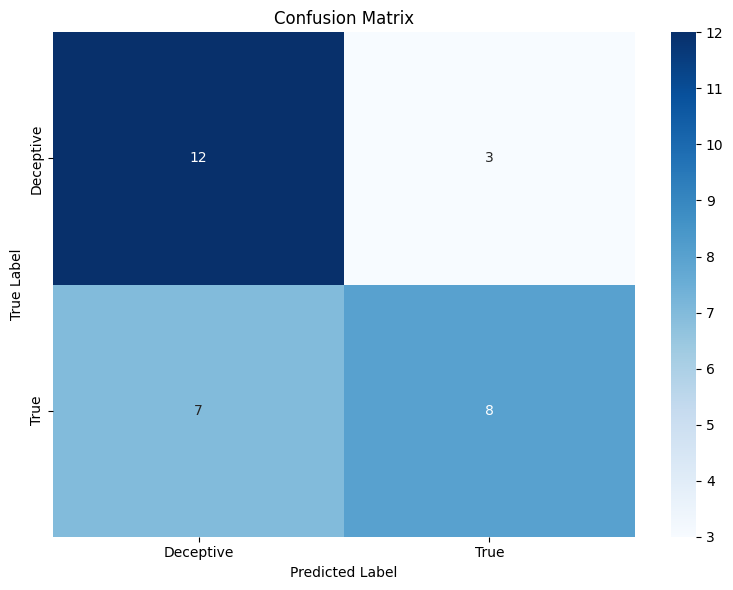

In [4]:
# Prediction and evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot: Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Deceptive', 'True'], yticklabels=['Deceptive', 'True'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


# 6 Experiments and results

My experimental results and the plotted images are shown above.

A. From my experimental results data, the model's accuracy is 66.67%.

1. **Category 0 (Deceptive Stories)**:
   - **Precision**: 0.63  
     In all the samples predicted as category 0, 63% were correct. This indicates that there is some false positive in the model's prediction of deceptive stories.
   - **Recall**: 0.80  
     The recall for category 0 is high, meaning the model correctly detects most of the deceptive stories with a low false negative rate.
   - **F1-score**: 0.71  
     Combining Precision and Recall, the F1 score for category 0 is relatively high, indicating that the model performs well in classifying deceptive stories.

2. **Category 1 (Real Stories)**:
   - **Precision**: 0.73  
     In the samples predicted as category 1, 73% were correct. The high precision indicates that there are relatively fewer false positives in the model's prediction of real stories.
   - **Recall**: 0.53  
     The recall for category 1 is low, at 53%, suggesting that the model fails to detect many real stories, leading to a high false negative rate.
   - **F1-score**: 0.62  
     The F1 score for category 1 is relatively low, indicating that the model's performance in classifying real stories is average.

**Overall accuracy**: 66.67%

3. **Macro Average and Weighted Average**:
   - **Macro Avg**:  
     Precision: 0.68, Recall: 0.67, F1-score: 0.66  
     Macro average is the average of the metrics for both classes. The precision and recall values are close to each other, suggesting that the model is not heavily biased toward either class.
   
   - **Weighted Avg**:  
     Precision: 0.68, Recall: 0.67, F1-score: 0.66  
     The weighted average takes into account the number of samples in each class (which is the same in this case, so it aligns with the macro average). Since the class distribution is even, the macro and weighted averages are not significantly different.

B. **Analysis of the Confusion Matrix**:

1. **True Positive (TP)**: Top left (Deceptive-Deceptive): 12  
   This means the model correctly identified 12 deceptive stories.

2. **True Negative (TN)**: Bottom right (True-True): 8  
   This means the model correctly identified 8 real stories.

3. **False Positive (FP)**: Bottom left (True-Deceptive): 7  
   This means the model incorrectly classified 7 real stories as deceptive.

4. **False Negative (FN)**: Top right (Deceptive-True): 3  
   This means the model incorrectly classified 3 deceptive stories as real.

5. **Precision**:  
   Precision = 12 / (7 + 12) ≈ 0.63  
   This means that, of all the stories predicted as deceptive, 63% were correct.

6. **Recall**:  
   Recall = 12 / (3 + 12) = 0.80  
   This means that, of all the truly deceptive stories, 80% were correctly identified.

7. **Accuracy**:  
   Accuracy = (12 + 8) / (12 + 8 + 7 + 3) ≈ 0.67

8. **F1-score**:  
   F1 = 2 * (0.63 * 0.80) / (0.63 + 0.80) ≈ 0.70

**Issues noticed during testing**:
1. The features in the data may not be sufficient to distinguish between category 0 and category 1. If the features don't well capture the difference between categories, the model, no matter how complex, will be limited.
2. The data may contain too much noise or incorrect labeling, which could prevent the model from learning the true classification boundaries.
3. The feature space for category 0 and category 1 might have significant overlap, making it difficult for the model to distinguish between the two classes.

# 7 Conclusions

#### Conclusion:
Code Structure: My code is organized according to the process of reading audio data, extracting features, training, and evaluation. It utilizes common audio processing libraries such as librosa and machine learning libraries like scikit-learn.
Functionality: The code extracts features from audio files, uses these features to train a Random Forest model, and finally generates classification reports and visual results.

#### Suggestions for Improvement:
1、Add More Audio Features:
In addition to MFCC features, it might be helpful to try incorporating other common audio features, such as Mel-spectrograms or Zero Crossing Rate, as they could improve the model's accuracy.
Depending on the task requirements, additional time-frequency domain features, such as Chroma or Spectral Contrast, could also be added.

2、Model Tuning:
The current model uses the default RandomForestClassifier. Hyperparameter tuning could be performed to find the optimal model configuration. For example, GridSearchCV or RandomizedSearchCV can be used for cross-validation and hyperparameter search.
Hyperparameters such as n_estimators, max_depth, and min_samples_split significantly impact the performance of the Random Forest model.

# 8 References
1、https://scikit-learn.org/stable/

2、https://librosa.org/doc/latest/index.html

3、https://github.com/timsainb/noisereduce



My GitHub Address: https://github.com/HanJiaruiruirui/CBU5201_miniproject_Han-Jiarui